     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Female  \
0             1   19                  15              39             0   
1             2   21                  15              81             0   
2             3   20                  16               6             1   
3             4   23                  16              77             1   
4             5   31                  17              40             1   
..          ...  ...                 ...             ...           ...   
195         196   35                 120              79             1   
196         197   45                 126              28             1   
197         198   32                 126              74             0   
198         199   32                 137              18             0   
199         200   30                 137              83             0   

     Genre_Male  
0             1  
1             1  
2             0  
3             0  
4             0  
.. 

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

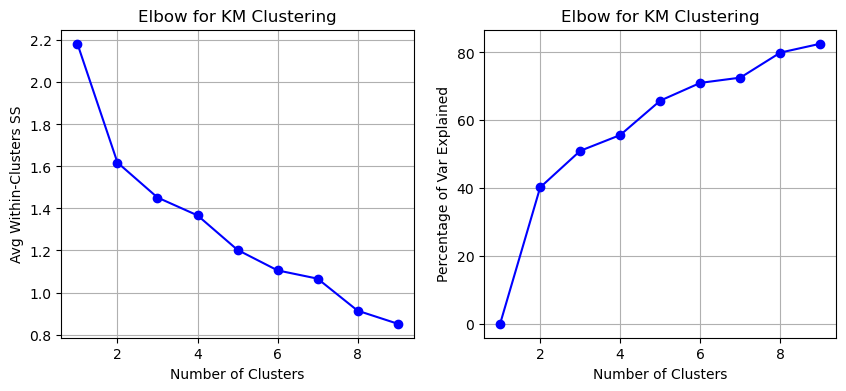

Silhouette Score:  [0.39644160577705434, 0.3656360567136072, 0.3586609819997774, 0.3385716678700214, 0.36320614726306116, 0.3655862596855603, 0.40401085454585156, 0.41967833479905337]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

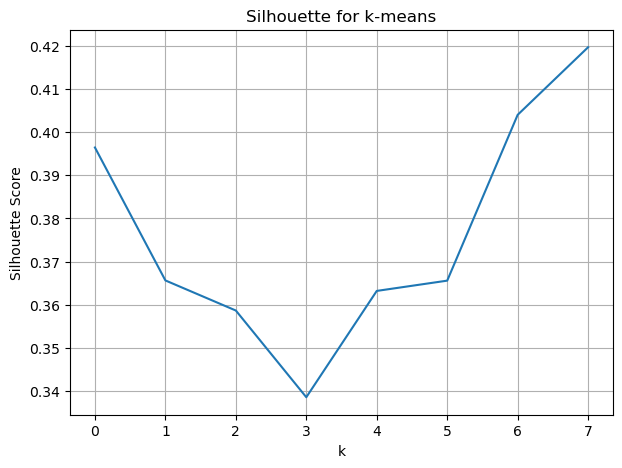

Agglomerative Clusters:  [2 2 0 0 0 0 0 0 1 0 1 0 0 0 2 2 0 2 1 0 2 2 0 2 0 2 0 2 0 0 1 0 1 2 0 0 0
 0 0 0 0 2 1 0 0 0 0 0 0 0 0 2 0 1 0 1 0 1 0 1 1 2 0 0 1 2 0 0 2 0 1 0 0 0
 1 2 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 2 1 0 0 2 0 0 1 2 0 0 1 2 1 0 0 1 1 1 1
 0 0 2 0 0 0 0 0 0 2 0 0 2 0 0 1 2 1 2 1 2 0 0 1 0 0 2 1 0 0 2 0 0 1 2 1 0
 0 2 1 2 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 2 1 2 1 2 0 0 1 2 1 2 0 0 1 0 0
 2 0 2 0 0 0 0 1 0 0 0 0 2 1 2]


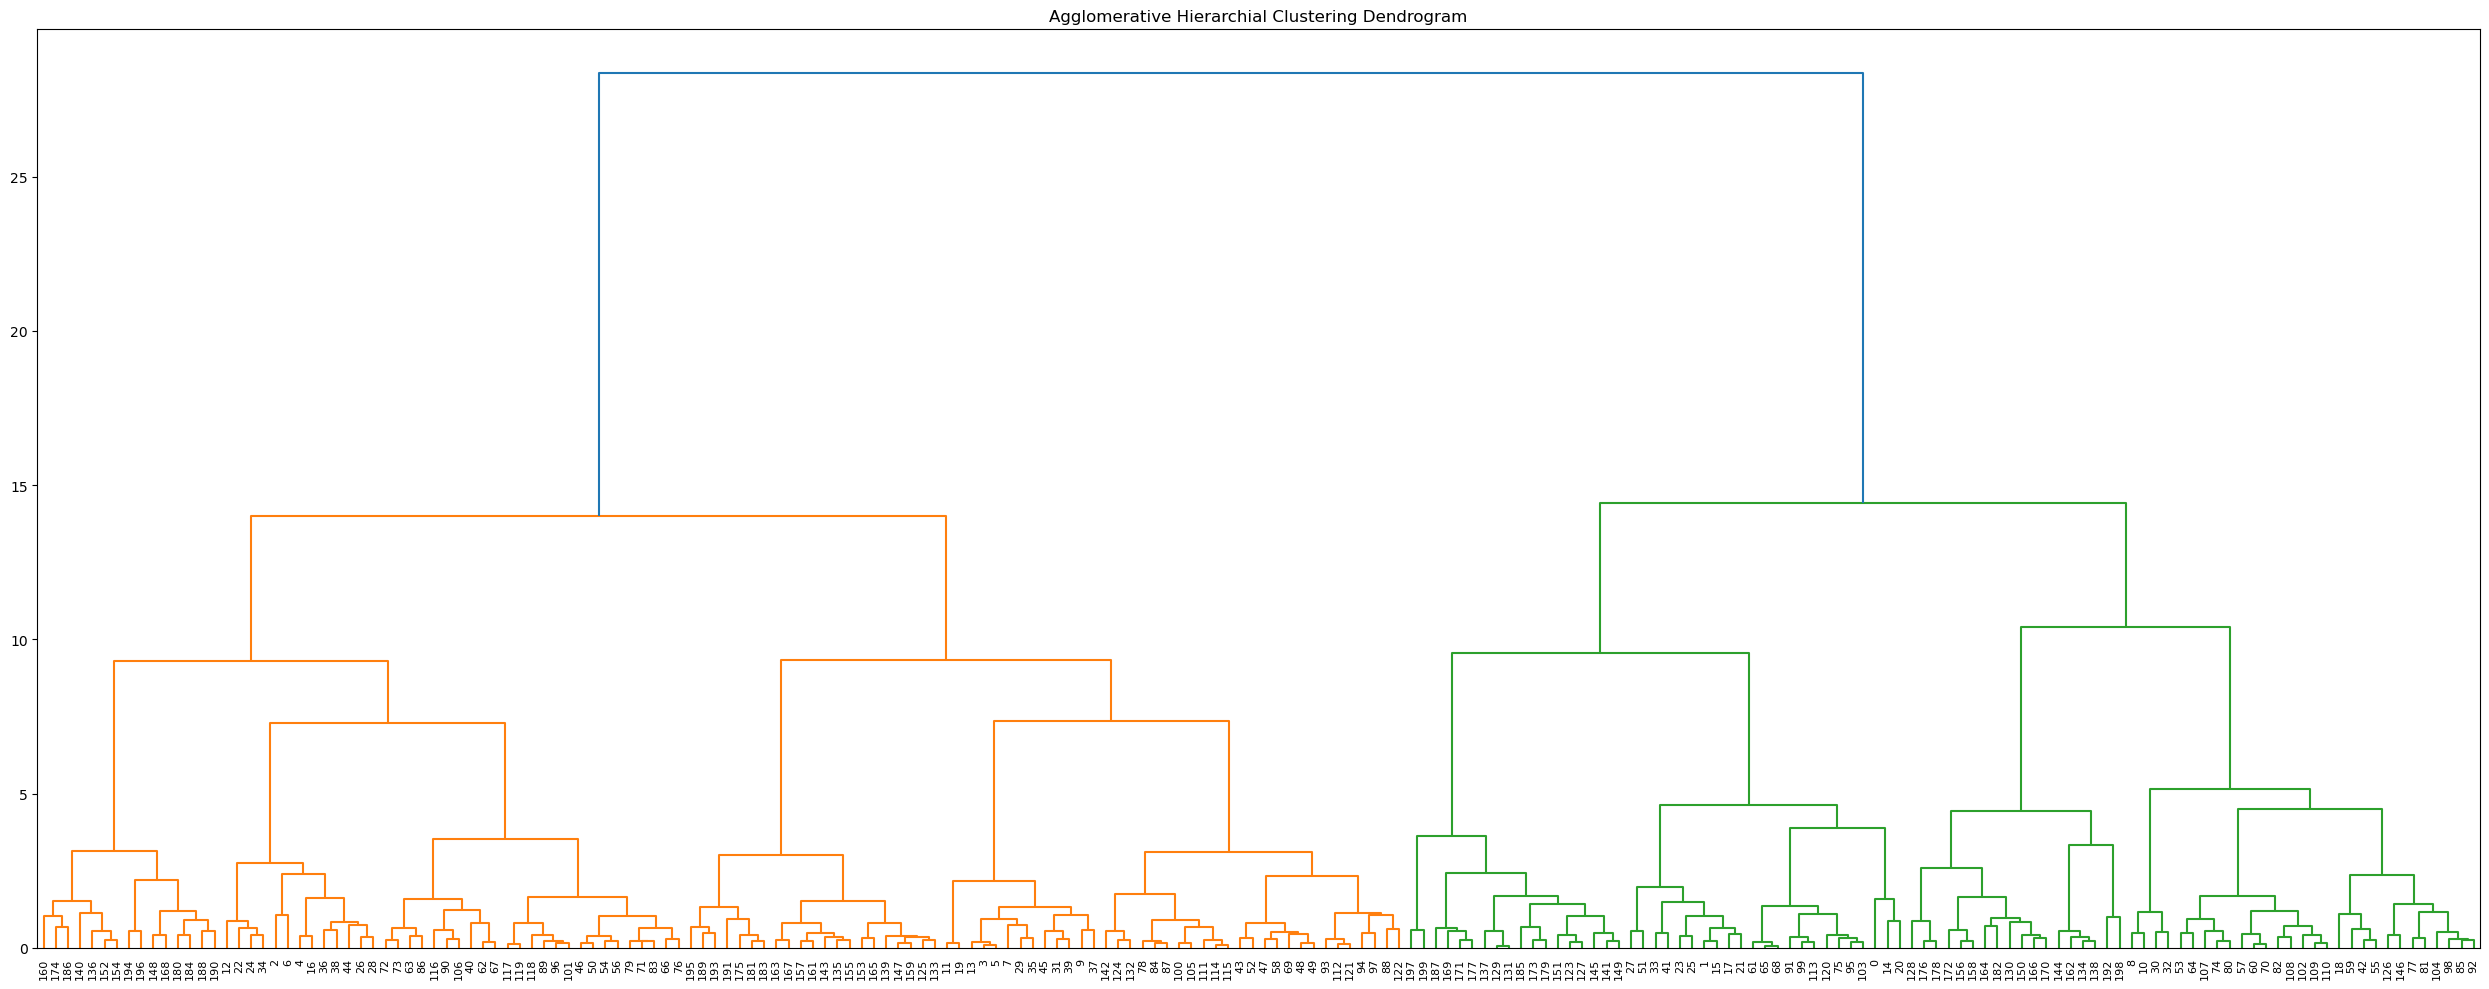

     CustomerID  Age  Annual_Income_(k$)  Spending_Score  Genre_Female  \
0             1   19                  15              39             0   
1             2   21                  15              81             0   
2             3   20                  16               6             1   
3             4   23                  16              77             1   
4             5   31                  17              40             1   
..          ...  ...                 ...             ...           ...   
195         196   35                 120              79             1   
196         197   45                 126              28             1   
197         198   32                 126              74             0   
198         199   32                 137              18             0   
199         200   30                 137              83             0   

     Genre_Male  Clustered  
0             1          0  
1             1          0  
2             0         

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score
from sklearn import metrics
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

df = pd.read_csv('C:/Users/Admin/Downloads/Mall_Customers.csv')
df = pd.get_dummies(df, columns=['Genre']).astype(np.int64)
print(df)

x = df[['Age', 'Annual_Income_(k$)', 'Spending_Score', 'Genre_Female', 'Genre_Male']]
x = StandardScaler().fit_transform(x)

K = range(1, 10)
KM = [KMeans(n_clusters=k, random_state=1).fit(x) for k in K]
centroids = [k.cluster_centers_ for k in KM]
D_k = [cdist(x, cent, 'euclidean') for cent in centroids]
dist = [np.min(D, axis=1) for D in D_k]
avgWithinSS = [sum(d)/x.shape[0] for d in dist]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(K, avgWithinSS, 'bo-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Avg Within-Clusters SS')
plt.title('Elbow for KM Clustering')

wcss = [sum(d**2) for d in dist]
tss = sum(pdist(x)**2)/x.shape[0]
bss = tss - wcss
varExplained = bss/tss*100

plt.subplot(1, 2, 2)
plt.plot(K, varExplained, 'bo-')
plt.grid(True)
plt.xlabel('Number of Clusters')
plt.ylabel('Percentage of Var Explained')
plt.title('Elbow for KM Clustering')
plt.show()

score = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(x)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    score.append(silhouette_score(x, labels, metric='euclidean'))

print('Silhouette Score: ', score)

plt.figure(figsize=(7, 5))
plt.plot(score)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette for k-means')
plt.show()

model = AgglomerativeClustering(n_clusters=3).fit(x)
print('Agglomerative Clusters: ', model.labels_)

z = linkage(x, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Agglomerative Hierarchial Clustering Dendrogram')
dendrogram(
    z,
    leaf_rotation=90,
    leaf_font_size=8
)
plt.tight_layout()
plt.show()


kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
df['Clustered'] = kmeans.labels_
print(df)
print(df['Clustered'].value_counts())
print(df.groupby('Clustered').mean())